atlantic_cod: 4.3 9.3e+01
polar_cod: 0.2 8.8e+01
walleye_pollock: 3.6 8.3e+01
atlantic_cod: 1.4e+01 4.7
polar_cod: 7.5 1.5
walleye_pollock: 1.3e+01 3.0


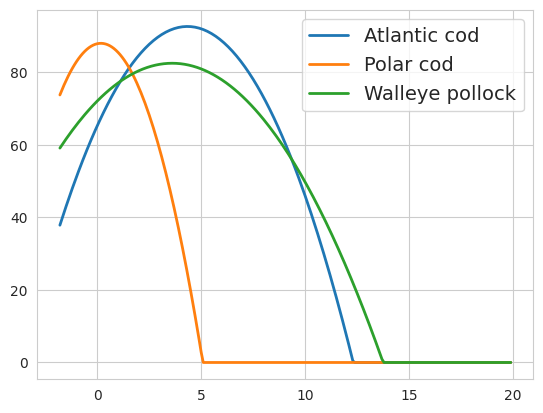

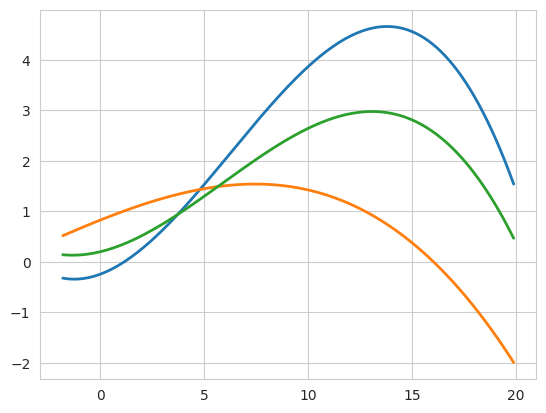

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from pathlib import Path

sns.set_style("whitegrid")
sns.set_palette("tab10")


def calculate_egg_survival(T, specie):
    if specie == "pacific_cod":
        # Laurel et al., 2020
        H = (0.453 / (1 + ((T - 4.192) / 2.125) ** 2)) * 100
    elif specie == "atlantic_cod":
        # Dahlke et al., 2018
        H = -318027.1388 + (318119.8195 / (1 + ((T - 4.337) / 467.4799) ** 2))
    elif specie == "polar_cod":
        # Laurel et al., 2018
        H = 87.926 + 1.266 * T - 3.6582 * T**2
    elif specie == "walleye_pollock":
        # Laurel et al., 2018
        H = 72.127 + 5.775 * T - 0.801 * T**2
    H = np.where(H < 0, 0.0, H)
    return H


def calculate_juvenile_growth(T, specie):
    if specie == "atlantic_cod":
        # Bjørnsson et al., 2007
        G = -0.2425 + 0.1519 * T + 0.0552 * T**2 - 0.002931 * T**3

    elif specie == "polar_cod":
        # Laurel et al., 2016
        G = 0.8290 + 0.1638 * T - 0.0054 * T**2 - 0.0005 * T**3

    elif specie == "pacific_cod":
        G = 0.2494 + 0.3216 * T - 0.0069 * T**2 - 0.0004 * T**3

    elif specie == "walleye_pollock":
        G = 0.2023 + 0.0992 * T + 0.0335 * T**2 - 0.0019 * T**3
    return G


def get_max(temperature, prop, specie):
    max_index = prop.argmax()
    print(f"{specie}: {temperature[max_index]:3.2} {prop[max_index]:3.2}")


types = ["egg", "juvenile"]
species = ["atlantic_cod", "polar_cod", "walleye_pollock"]
species_name = ["Atlantic cod", "Polar cod", "Walleye pollock"]
temperature = np.arange(-1.8, 20, 0.1)

for t in types:
    fig1, ax1 = plt.subplots()
    for specie, name in zip(species, species_name):
        if t == "egg":
            prop = calculate_egg_survival(temperature, specie=specie)
            ylabel = "Egg survival (%)"
        elif t == "juvenile":
            prop = calculate_juvenile_growth(temperature, specie=specie)
            ylabel = "Growth rate (%/day)"
        else:
            break

        get_max(temperature, prop, specie)

        ax1.plot(temperature, prop, label=name, linewidth=2)
        # plt.xlabel("Temperature (degree Celsius)")
        # plt.ylabel(ylabel)

        if t == "egg":
            plt.legend(fontsize=14, loc="upper right")
        plotfile = f"Figures/{t}_survival_theoretical.png"
        if Path(plotfile).exists:
            Path(plotfile).unlink
        plt.savefig(plotfile, facecolor="white", dpi=300)